In [1]:
import numpy as np

In [2]:
def loadDataSet(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine))
        dataMat.append(fltLine)
    return dataMat

In [3]:
class treeNode():
    def __init__(self,feat,right,left):
        featureToSplit = feat  #待切分的特征
        valueOfSplit = val  #待切分的特征值
        rightBranch = right  #右子树
        leftBranch = left  #左子树

In [4]:
#将数据集按特征值进行切分
def binSplitDataSet(dataSet,feature,value):
    mat0 = dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
    mat1 = dataSet[np.nonzero(dataSet[:,feature]<=value)[0],:]
    return mat0,mat1

In [5]:
# 计算列的均值
def regLeaf(datSet):
    return np.mean(datSet[:,-1])

In [6]:
def regErr(dataSet):
    return np.var(dataSet[:,-1])*np.shape(dataSet)[0]

In [7]:
def chooseBestSplit(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    tolS = ops[0]
    tolN = ops[1]
    print()
    if len(set(dataSet[:,-1].T.tolist()[0])) == 1:
        return None,leafType(dataSet)
    m,n = np.shape(dataSet)
    S = errType(dataSet)
    bestS = np.inf;
    bestIndex = 0
    bestValue = 0
    for featIndex in range(n-1):
        for splitVal in set(dataSet[:,featIndex].T.tolist()[0]):
            mat0,mat1 = binSplitDataSet(dataSet,featIndex,splitVal)
            if(np.shape(mat0)[0]<tolN) or (np.shape(mat1)[0]<tolN):
                continue
            newS = errType(mat0)+errType(mat1)
            if newS <bestS:
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    if(S-bestS)<tolS:
        return None,leafType(dataSet)
    mat0,mat1 = binSplitDataSet(dataSet,bestIndex,bestValue)
    if(np.shape(mat0)[0]<tolN or np.shape(mat1)[0]<tolN):
        return None,leafType(dataSet)
    return bestIndex,bestValue

In [8]:
def createTree(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    feat,val = chooseBestSplit(dataSet,leafType,errType,ops)
    if feat == None:
        return val
    retTree = {}
    retTree['spInd'] = feat
    retTree['spVal'] = val
    lSet,rSet = binSplitDataSet(dataSet,feat,val)
    retTree['left'] = createTree(lSet,leafType,errType,ops)
    retTree['right'] = createTree(rSet,leafType,errType,ops)
    return retTree

In [9]:
myDat = loadDataSet("ex00.txt")
myDat = np.mat(myDat)
createTree(myDat)

{'left': 1.0180967672413792,
 'right': -0.04465028571428572,
 'spInd': 0,
 'spVal': 0.48813}

In [10]:
import matplotlib.pyplot as plt

In [30]:
np.array(myDat[:,0]).ravel()

(200,)

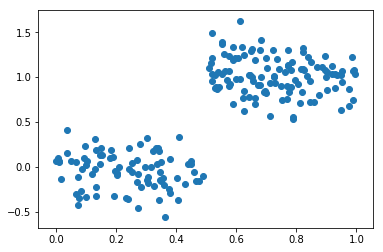

In [31]:
plt.scatter(np.array(myDat[:,0]).ravel().T,np.array(myDat[:,1]).ravel())
plt.show()